<a href="https://colab.research.google.com/github/Viktoria574/ML/blob/main/TIMO_pract5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пункт 1:

Найти и подготовить данные для задачи классификации

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('bank_data.csv')

data.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
data.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# Удаление повторяющихся строк
data = data.drop_duplicates()

# Удаляем строки с значением 'unknown'
data = data.replace('unknown', pd.NA).dropna()

# Переводим категориальные столбцы 'yes' и 'no' в числовые значения 1 и 0
data['default'] = data['default'].map({'yes': 1, 'no': 0})
data['housing'] = data['housing'].map({'yes': 1, 'no': 0})
data['loan'] = data['loan'].map({'yes': 1, 'no': 0})
data['y'] = data['y'].map({'yes': 1, 'no': 0})
data = data.drop(columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])

# Нормализация для Min-Max Scaling
scaler = MinMaxScaler()
data =  pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
print("Размерность датасета: ",data.shape)
data.head()

Размерность датасета:  (764, 12)


,Unnamed: 0,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,0.000000,0.196970,0.0,0.223381,1.0,1.0,0.333333,0.136595,0.0,0.388506,0.125000,0.0
1,0.000221,0.227273,0.0,0.099256,1.0,0.0,0.500000,0.114358,0.0,0.378161,0.000000,0.0
2,0.000885,0.227273,0.0,0.077492,0.0,0.0,0.733333,0.086404,0.1,0.201149,0.083333,0.0
3,0.001106,0.242424,0.0,0.061611,1.0,0.0,0.433333,0.213469,0.0,0.378161,0.041667,0.0
4,0.001770,0.348485,0.0,0.047354,1.0,1.0,0.533333,0.195680,0.0,0.167816,0.041667,0.0


In [ ]:
x = data.drop("y", axis=1)
y = data["y"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Пункт 2:

Построить дерево решений

Accuracy: 0.75


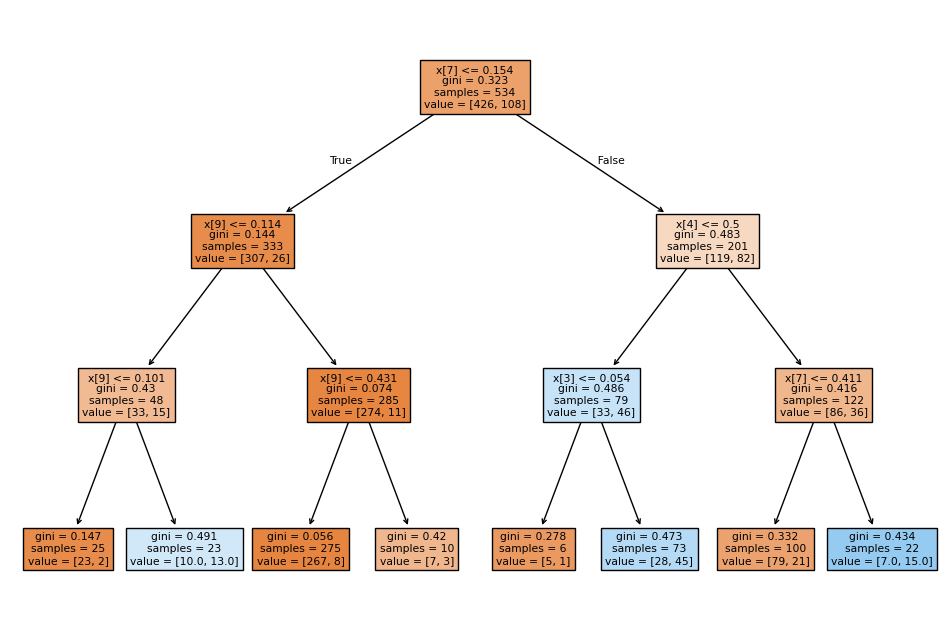

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True) # визуализация
plt.show()

# Пункт 3:

Подобрать гиперпараметры дерева решений

In [ ]:
dt = DecisionTreeClassifier()

#Определение сетки гиперпараметров
param_grid = {
'max_depth': [2, 3, 4],
'min_samples_split': [2, 3, 4],
'min_samples_leaf': [2, 3, 4],
'criterion': ['entropy', 'gini']
}

# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
# Обучение и подбор гиперпараметров
grid_search.fit(X_train, y_train)
# Лучшие гиперпараметры
print("Лучшие параметры:", grid_search.best_params_)
# Оценка модели с лучшими параметрами
best_model = grid_search.best_estimator_

Лучшие параметры: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


Accuracy: 0.752


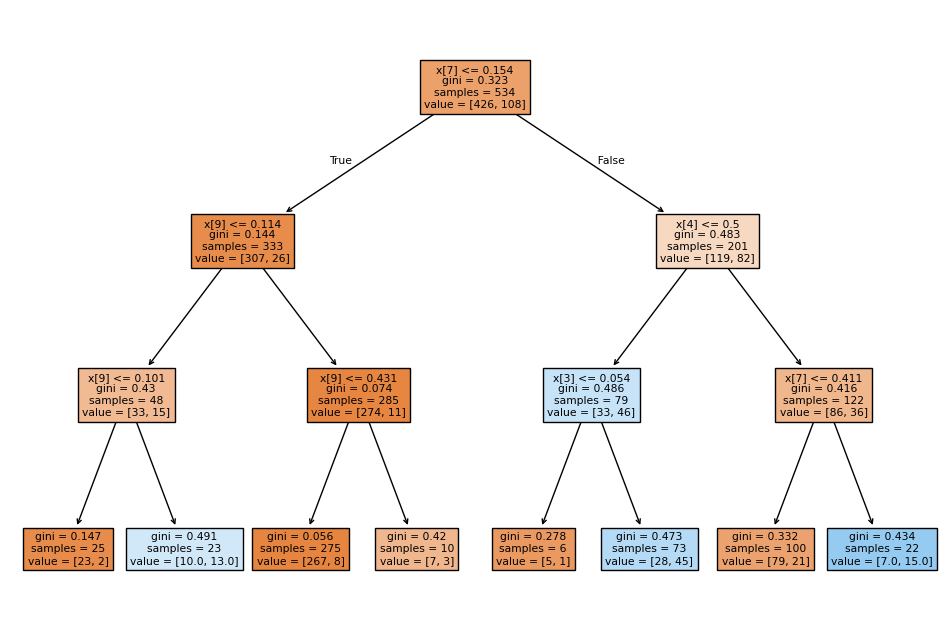

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=2, criterion='gini') # модель
clf.fit(X_train, y_train) # обучение модели
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True) # визуализация
plt.show()

# Пункт 4:

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Оценка точности
accuracy = rf.score(X_test, y_test)

In [ ]:
# Инициализация и обучение XGBoost
xg_clf = xgb.XGBClassifier(n_estimators=100, seed=42)
xg_clf.fit(X_train, y_train)
# Оценка точности
accuracy = xg_clf.score(X_test, y_test)

In [ ]:
#Определение базовых моделей
base_estimators = [
('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
('dt', DecisionTreeClassifier(max_depth=3, random_state=42))
]
# Метамодель
final_estimator = LogisticRegression()
# Создание стекинг-классификатора
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)
# Обучение и оценка модели
stacking_clf.fit(X_train, y_train)
accuracy = stacking_clf.score(X_test, y_test)

# Пункт 5:

In [ ]:
def metrics_of_model(model, X_test, y_test):
    # Предсказания модели
    y_pred = model.predict(X_test)
    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Точность: {accuracy}")
    print(f"Точность (Precision): {precision}")
    print(f"Полнота (Recall): {recall}")
    print(f"F1-score: {f1}")
    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    print(f"Матрица ошибок:\n {cm}")


    return {
          'Accuracy': accuracy,
          'Precision': precision,
          'Recall': recall,
          'F1-score': f1,
      }

In [ ]:
result={}
print('Decision Tree', end='\n\n')
result['Decision Tree'] = metrics_of_model(clf, X_test, y_test)

Decision Tree

Точность: 0.7521739130434782
Точность (Precision): 0.6878840245775729
Полнота (Recall): 0.6860089345119285
F1-score: 0.6869253731343283
Матрица ошибок:
 [[139  28]
 [ 29  34]]


In [ ]:
print('Random Forest Classifier', end='\n\n')
result['Random Forest Classifier'] = metrics_of_model(rf, X_test, y_test)

Random Forest Classifier

Точность: 0.7565217391304347
Точность (Precision): 0.7332228666114333
Полнота (Recall): 0.5802680353578558
F1-score: 0.5763157894736842
Матрица ошибок:
 [[162   5]
 [ 51  12]]


In [ ]:
print('XG Classifier')
result['XG Classifier'] = metrics_of_model(xg_clf, X_test, y_test)

XG Classifier
Точность: 0.7739130434782608
Точность (Precision): 0.7149622279851167
Полнота (Recall): 0.6812090105503279
F1-score: 0.6931444991789819
Матрица ошибок:
 [[148  19]
 [ 33  30]]


In [ ]:
print('Stacking Classifier')
result['Stacking Classifier'] = metrics_of_model(stacking_clf, X_test, y_test)

Stacking Classifier
Точность: 0.7608695652173914
Точность (Precision): 0.7066666666666667
Полнота (Recall): 0.6178595190571239
F1-score: 0.6293691951598254
Матрица ошибок:
 [[156  11]
 [ 44  19]]


In [ ]:
Res = pd.DataFrame(result).T
display(Res)

,Accuracy,Precision,Recall,F1-score
Decision Tree,0.752174,0.687884,0.686009,0.686925
Random Forest Classifier,0.756522,0.733223,0.580268,0.576316
XG Classifier,0.773913,0.714962,0.681209,0.693144
Stacking Classifier,0.760870,0.706667,0.617860,0.629369
